In [2]:
# results에서 불러오기
import os

pathlist = os.listdir('./results')


In [4]:
path_weather = [dirs for dirs in pathlist if "weather" in dirs]
path_weather

["weather_192_96_iTransformer_custom_MS_ft192_sl48_ll96_pl1024_dm8_nh4_el1_dl1024_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_192_96_iTransformer_TCN_custom_MS_ft192_sl48_ll96_pl1024_dm8_nh3_el1_dl1024_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_custom_M_ft336_sl48_ll336_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_TCN_custom_M_ft336_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_TCN_custom_M_ft336_sl48_ll336_pl256_dm8_nh3_el1_dl256_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_iTransformer_TCN_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_noTCN_iTransformer_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_rework_iTransformer_TCN_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_pr

In [5]:
import numpy as np

load_files = ['metrics.npy', 'metrics_last.npy', 'pred.npy', 'true.npy']

file_path = './results/' + path_weather[-1] + '/'

pred_obj = np.load(file_path + 'pred.npy')
true_obj = np.load(file_path + 'true.npy')

In [10]:
pred_obj.shape, true_obj.shape # 시계열 96, 22차원, 10444 시도

((10444, 96, 22), (10444, 96, 22))

In [11]:
import matplotlib.pyplot as plt

In [12]:
# utils 불러오기
from utils.metrics import metric, REC_CORR, SMAE, RATIO_IRR

In [23]:
# 각 변수별 상관관계 파악
np.corrcoef(pred_obj[0,:,:].T).shape, np.corrcoef(true_obj[0,:,:].T).shape

((22, 22), (22, 22))

METRICS 1th var:: MAE- 0.00396882975474 MSE 2.2891637854627334e-05 CORR -0.13480042938206785 SMAE 0.003908430691808462 IRR(3) 0.0
METRICS 2th var:: MAE- 0.3653927743434906 MSE 0.2090974599123001 CORR -0.7995186644815943 SMAE -0.35127392411231995 IRR(3) 0.0
METRICS 3th var:: MAE- 0.31501856446266174 MSE 0.12375102192163467 CORR 0.8746808202835061 SMAE -0.3059101402759552 IRR(3) 0.0
METRICS 4th var:: MAE- 0.27198246121406555 MSE 0.09264811873435974 CORR 0.8872458034416556 SMAE -0.24936164915561676 IRR(3) 0.0
METRICS 5th var:: MAE- 0.43085670471191406 MSE 0.24635688960552216 CORR -0.6592109433948196 SMAE -0.4059242308139801 IRR(3) 0.0
METRICS 6th var:: MAE- 0.24246616661548615 MSE 0.10146429389715195 CORR 0.768559944292754 SMAE -0.0919480100274086 IRR(3) 0.020833333333333332
METRICS 7th var:: MAE- 0.19669032096862793 MSE 0.04499471187591553 CORR 0.9205846751167348 SMAE -0.18829305469989777 IRR(3) 0.0
METRICS 8th var:: MAE- 0.27643170952796936 MSE 0.104083351790905 CORR -0.175201158102873 

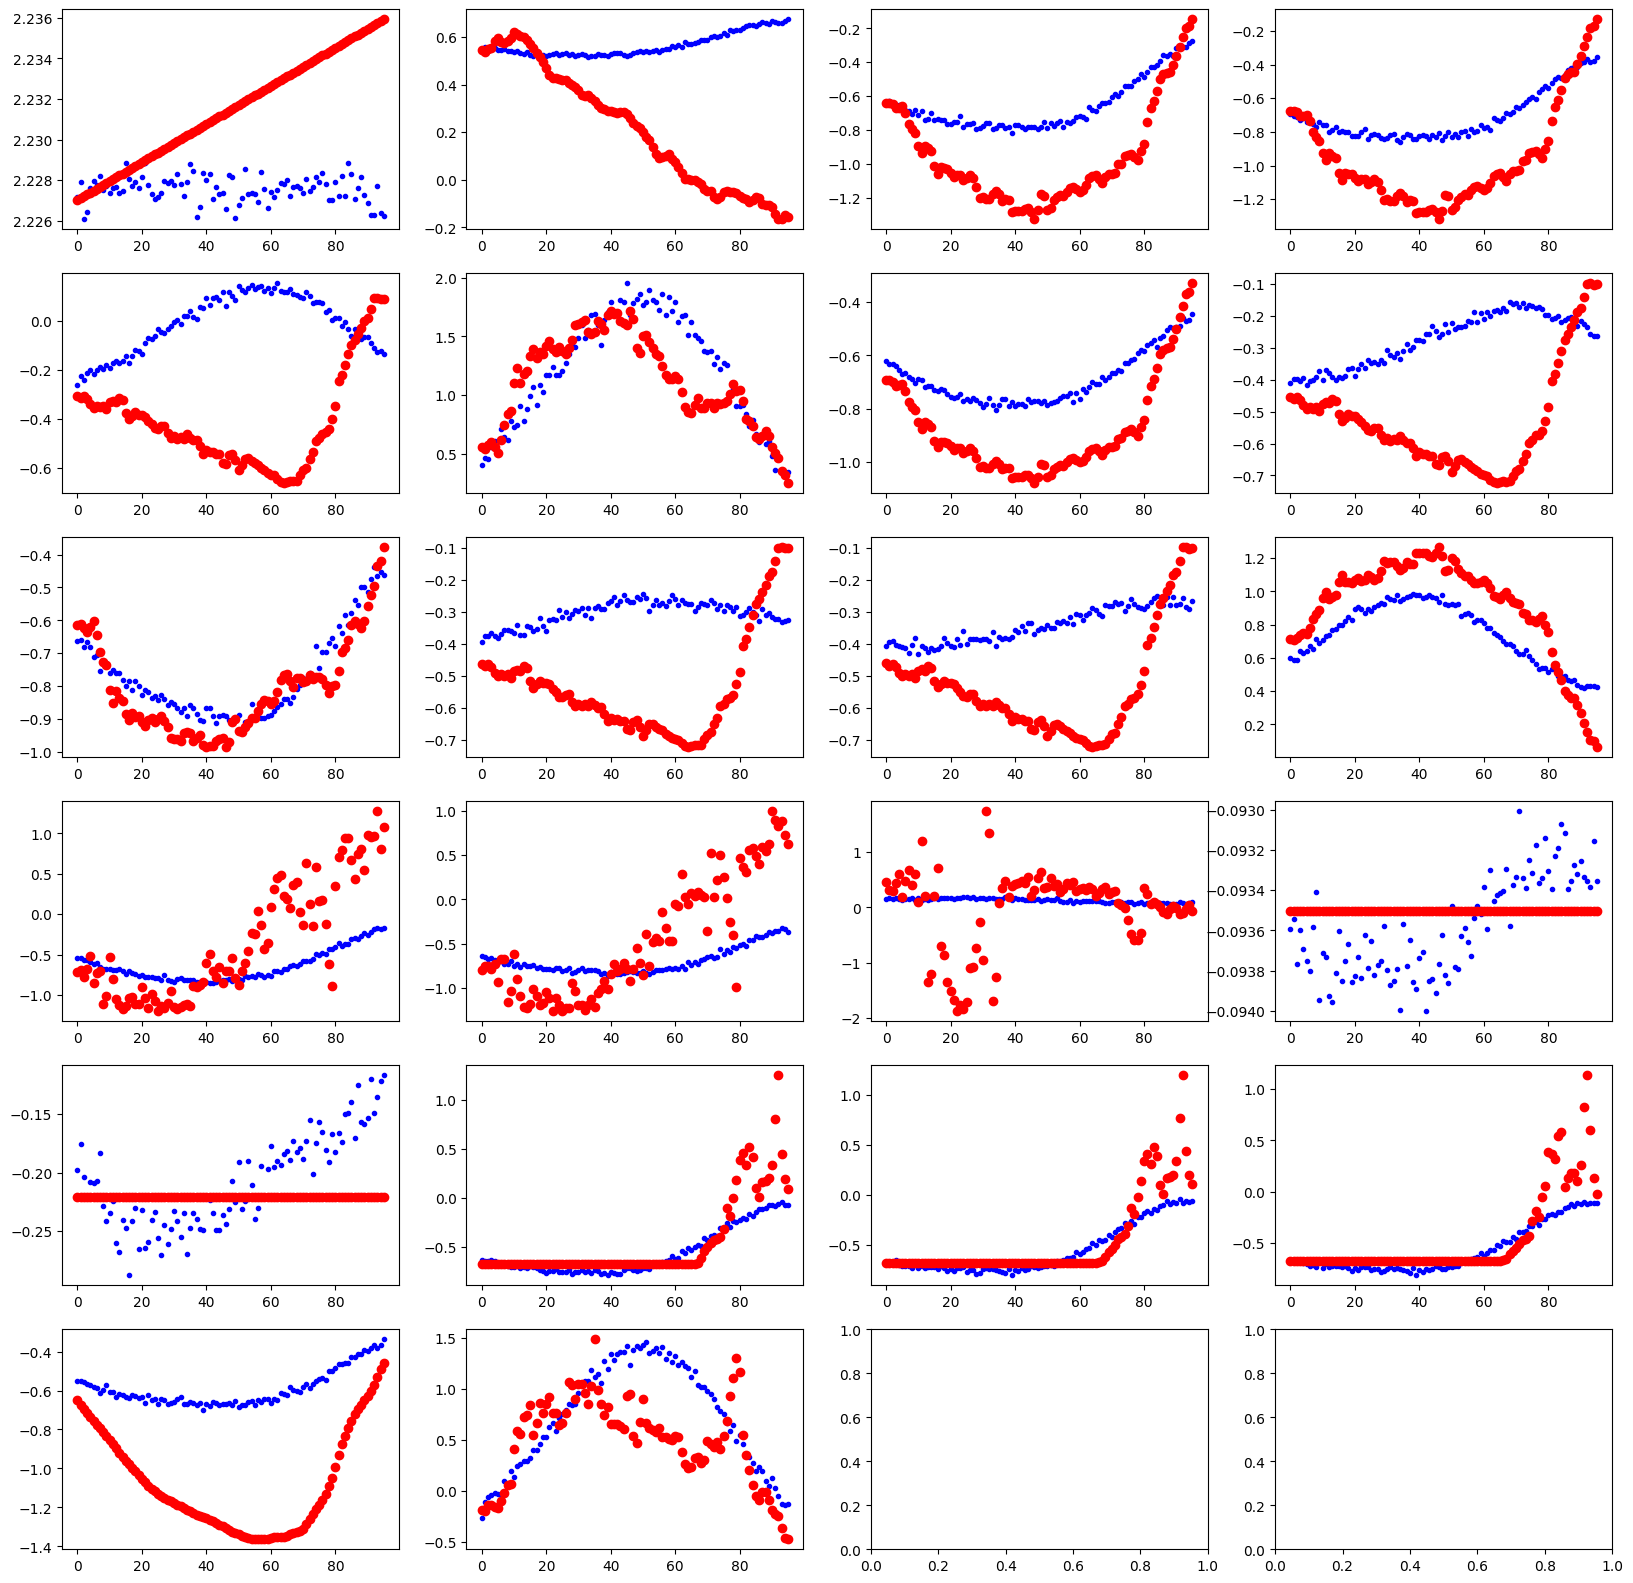

In [47]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 0

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 22:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.003064659656956792 MSE 1.6291107385768555e-05 CORR 0.21972252140929363 SMAE 0.0030532802920788527 IRR(3) 0.041666666666666664
METRICS 2th var:: MAE- 0.4694538116455078 MSE 0.29437002539634705 CORR -0.80407300302593 SMAE -0.4694538116455078 IRR(3) 0.0
METRICS 3th var:: MAE- 0.2923882305622101 MSE 0.11137548834085464 CORR 0.8398290327657918 SMAE 0.06140775978565216 IRR(3) 0.0
METRICS 4th var:: MAE- 0.26654332876205444 MSE 0.09961557388305664 CORR 0.8911208543225598 SMAE 0.1061599925160408 IRR(3) 0.0
METRICS 5th var:: MAE- 0.4160672128200531 MSE 0.2507932186126709 CORR 0.8124892153863349 SMAE 0.4035774767398834 IRR(3) 0.0
METRICS 6th var:: MAE- 0.36969542503356934 MSE 0.18758969008922577 CORR 0.8097317827464056 SMAE 0.061996400356292725 IRR(3) 0.0
METRICS 7th var:: MAE- 0.24991388618946075 MSE 0.09849081188440323 CORR 0.8163929479672346 SMAE 0.16619820892810822 IRR(3) 0.0
METRICS 8th var:: MAE- 0.2836247980594635 MSE 0.1195804700255394 CORR 0.7308545265043348 SMAE

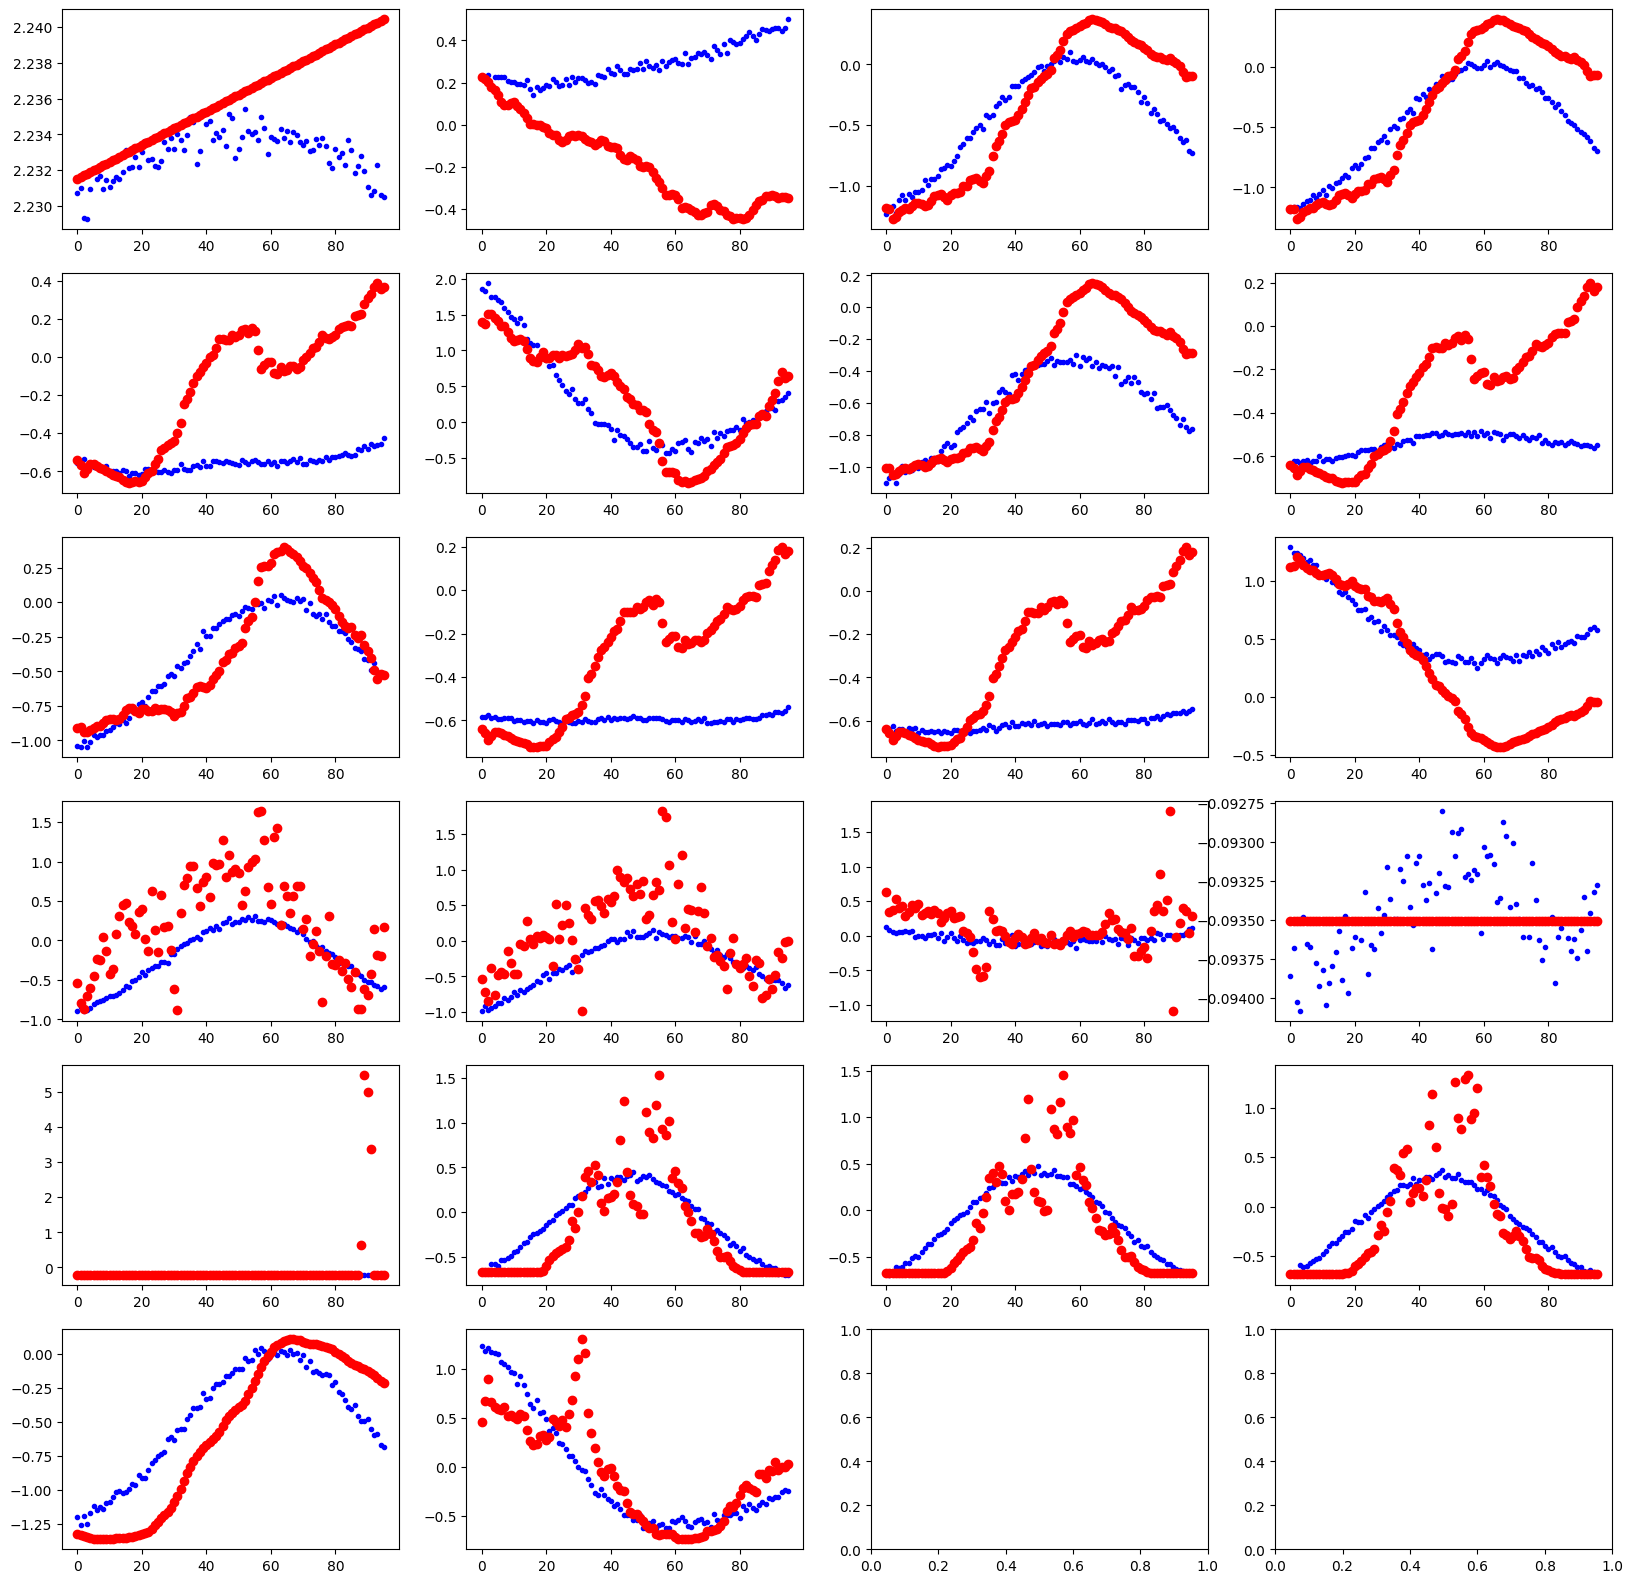

In [48]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 48

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 22:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.0034786537289619446 MSE 1.862264434748795e-05 CORR -0.7717317915505978 SMAE 0.0023097817320376635 IRR(3) 0.0
METRICS 2th var:: MAE- 0.19299089908599854 MSE 0.07247775048017502 CORR -0.5736662868358672 SMAE -0.19158625602722168 IRR(3) 0.0625
METRICS 3th var:: MAE- 0.35488319396972656 MSE 0.18615056574344635 CORR 0.8626098042660855 SMAE 0.35488319396972656 IRR(3) 0.0
METRICS 4th var:: MAE- 0.356024831533432 MSE 0.18845248222351074 CORR 0.8420131539989661 SMAE 0.35556504130363464 IRR(3) 0.0
METRICS 5th var:: MAE- 0.3821221590042114 MSE 0.20025794208049774 CORR -0.6810419584189997 SMAE 0.24724014103412628 IRR(3) 0.0
METRICS 6th var:: MAE- 0.5007298588752747 MSE 0.3550041615962982 CORR 0.7860379563325395 SMAE -0.3850139081478119 IRR(3) 0.0
METRICS 7th var:: MAE- 0.29007697105407715 MSE 0.10366346687078476 CORR 0.8500710829037423 SMAE 0.29007697105407715 IRR(3) 0.0
METRICS 8th var:: MAE- 0.3752022981643677 MSE 0.20257514715194702 CORR -0.7303256168467923 SMAE 0.29316

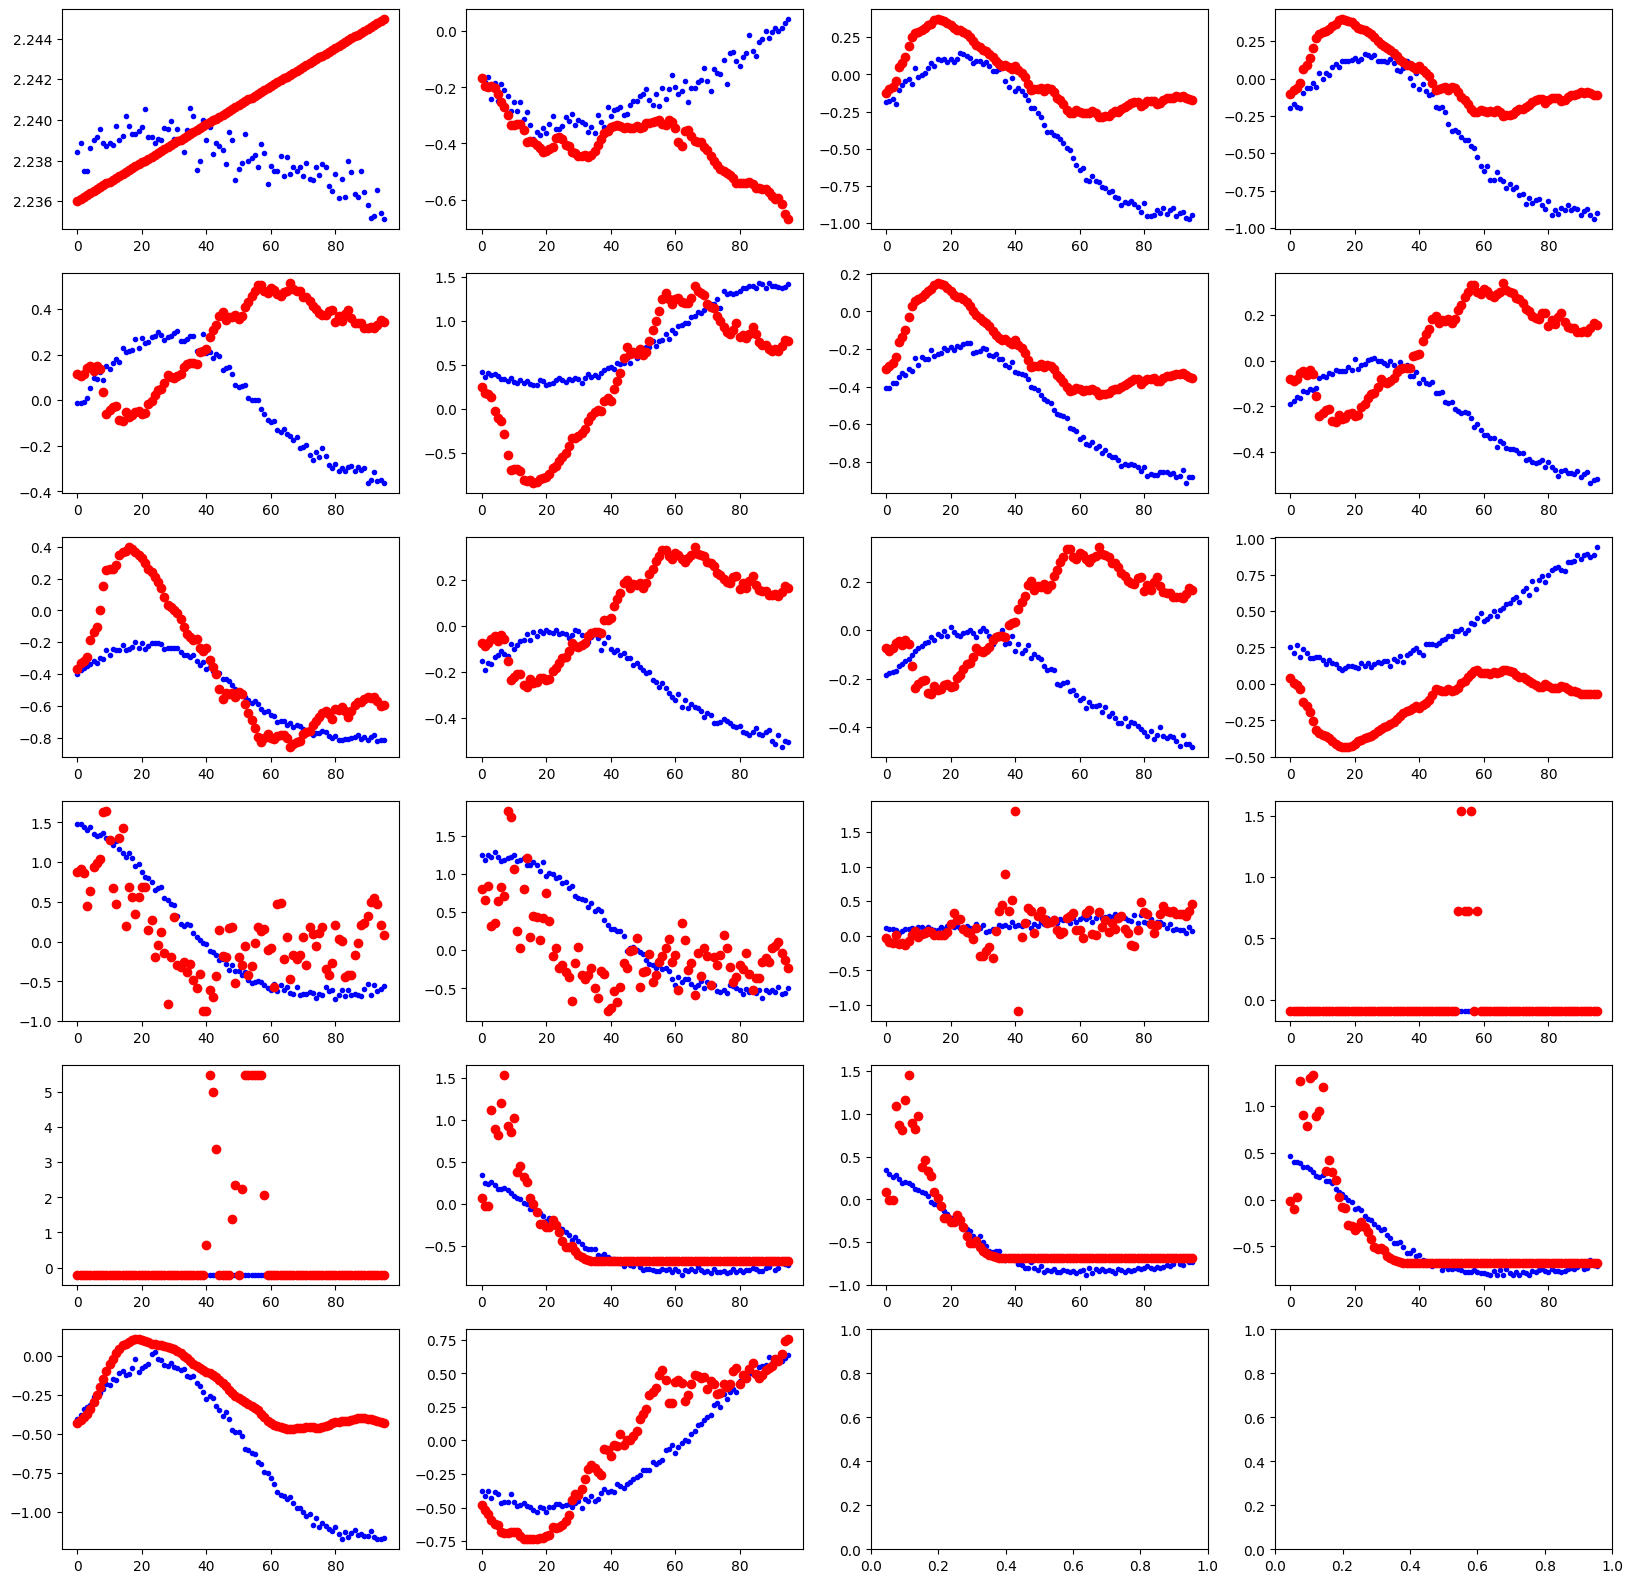

In [49]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 96

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 22:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

In [40]:
true_obj[0, 0, :]

array([ 2.2270098 ,  0.5465991 , -0.6398643 , -0.67572546, -0.30697462,
        0.5619792 , -0.6935343 , -0.45367682, -0.6148713 , -0.46277624,
       -0.46122378,  0.71155715, -0.7129122 , -0.7938599 ,  0.4520802 ,
       -0.09350552, -0.22105041, -0.67276675, -0.6794928 , -0.67731243,
       -0.6482482 , -0.1864404 ], dtype=float32)

In [46]:
# 체크하기 # 시계열 true[s, t, v] = true[s', t' ,v] if s+t = s'+t'
cnt = 0 
for v in range(22):
    for j in range(96):
        for k in range(j):
            if true_obj[0, j, v] != true_obj[k, j-k, v]:
                cnt +=1
print(cnt)

0
